# A9.2 Bayesian Inference

By Yi-Chi Liao (yi-chi.liao@aalto.fi)       

Feel free to contact me if there's any questions.

In this assignment, we use the Pmf package, as introduced in the lecture, to run some simple Bayesian inferences.


### Task 9.2.1 German Tank Problem

Imagine you are a stastician working for Western Allies during War World II, and your most important task is to estimate how many Panzer V tanks were made from a specific factory everyday. Based on the intelligence, your only information is that a typical tank factory can produce less than 200 tanks per day. 

The only helpful information you have is the serial number from the captured tanks. We already know that the German tank will be produced from serial number 1 to N based on its daily production rate. If we capture a tank with serial number 43, we know this is the 43rd tank the factory made at some day. Because every data you collect (capture one tank) is very expensive, you have to make the best out of every data point. Bayesian inference seems to be the best tool in this scenario. 

Please follow the code to help Western Allies win the war.

**Environment requirements: numpy, matplotlib, pandas, and empiricaldist**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from empiricaldist import Pmf
from ipywidgets import interact

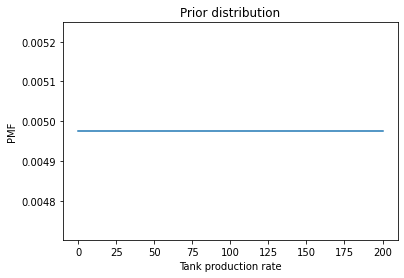

In [44]:
# Init the plotting function
def decorate_tank(title):
    """Labels the axes.
    
    title: string
    """
    plt.xlabel('Tank production rate')
    plt.ylabel('PMF')
    plt.title(title)

# Create a uniform probability as prior belif
tank_model = Pmf.from_seq(range(201))

tank_model.plot()
decorate_tank('Prior distribution')

Now, please write down your likelihood function.

In [45]:
def likelihood_tank(data, hypo):
    """Likelihood function for the tank production rate estimation.
    
    data: the serial number of 1 captured tank
    hypo: the tank production rate
    
    returns: float probability
    """
    return 1

In [46]:
### Suggested answer

def likelihood_tank(data, hypo):
    if data > hypo:
        return 0
    else:
        return 1 / hypo

On a lucky day, you captured 5 tanks and found the serial numbers are: 8, 7, 7, 5, 4. 
  
What is the most likely tank production rate to you? And what is the 95% credibility region?   
(please use update function as we did in the lecture notebook)

In [47]:
### Write your answer here

Maximum apostiori probability is:  8
95% credibility region is:  [ 8. 19.]


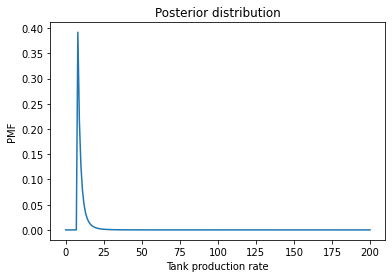

In [48]:
### Suggested answer 

for capture in [8, 7, 7, 5, 4]:
    tank_model.update(likelihood_tank, capture)
tank_model.plot()
decorate_tank('Posterior distribution')
print("Maximum apostiori probability is: ", tank_model.max_prob())

### They can use the built-in function, this is okay. 
print("95% credibility region is: ", tank_model.credible_interval(0.95))  

In [49]:
### Alternative answer for credible interval
### They may want to make their own credible interval calculation. 
### The resulting intervall should be the same

def my_credible_interval(model, prob_level):
    accum_prob = 0
    low_bound = 0
    high_bound = 0
    low_bound_found = False
    high_bound_found = False
    for i in range(len(model)):
        accum_prob += model[i]
        if (accum_prob > (0 + (1-prob_level)/2) and not low_bound_found):
            low_bound = i
            low_bound_found = True
        if (accum_prob > (1 - (1-prob_level)/2) and not high_bound_found):
            high_bound = i
            high_bound_found = True
    return low_bound, high_bound

# Function call here, the result is the same
print("95% credibility region is: ", my_credible_interval(tank_model, 0.95))  

95% credibility region is:  (8, 19)


A week later, you captured 2 tanks with serial numbers 45 and 74. 

What is your updated posterior probability distribution?   
What is the most likely tank production rate to you now? And what is your belief on that?   
(please use update function as we did in the lecture notebook)

In [32]:
### Write your answer here

Maximum apostiori probability is:  74
95% credibility region is:  [ 74. 134.]


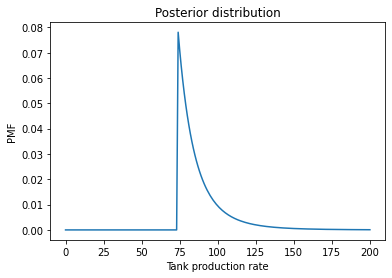

In [50]:
### Suggested answer

tank_model.update(likelihood_tank, 45)
tank_model.update(likelihood_tank, 74)
tank_model.plot()
decorate_tank('Posterior distribution')
print("Maximum apostiori probability is: ", tank_model.max_prob())
print("95% credibility region is: ", tank_model.credible_interval(0.95))

Anoter week later, you captured 4 tanks with serial numbers 124, 12, 20, 35. 

What is your updated posterior probability distribution?   
What is the most likely tank production rate to you now? And what is your belief on that?   
(please use update function as we did in the lecture notebook)

In [51]:
### Write your answer here

Maximum apostiori probability is:  124
95% credibility region is:  [124. 174.]


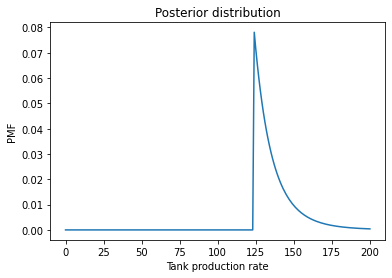

In [52]:
# Suggested answer
for capture in [124, 12, 20, 35]:
    tank_model.update(likelihood_tank, capture)
tank_model.plot()
decorate_tank('Posterior distribution')
print("Maximum apostiori probability is: ", tank_model.max_prob())
print("95% credibility region is: ", tank_model.credible_interval(0.95))

### Task 9.2.2 German Tank Problem -- using simulated data

As we tried on the lecture, we can use np.random to generate data. Imagine we have a tank capture model, that has a normal distributed probability (mean = 90, and sigma = 30), we can use this model to simulate capturing tanks and acquire their serial numbers.

Please implement the following code block for this function:

In [53]:
### Write down your answer
def plot_posterior(mu=90, sigma=30, N=0):
    # Init the same hypothesis
    ### TODO: fill your code
    
    # Set seed
    np.random.seed(420)

    # Capture tanks
    ### TODO: fill your code
    
    
    # Plot posterior
    tank_model.plot()
    decorate_tank('Posterior distribution')
    print("Maximum apostiori probability is: ", ____)
    print("95% credibility region is: ", ____)

In [54]:
### Suggested answer

def plot_posterior(mu=90, sigma=30, N=0):
    tank_model = Pmf.from_seq(range(201))
    
    # Set seed
    np.random.seed(42)

    # Capture tanks
    captures = np.random.normal(mu,sigma,N)
    for i in captures:
        i = int(i)
    
    for capture in captures:
        tank_model.update(likelihood_tank, capture)
    
    # Plot posterior
    tank_model.plot()
    decorate_tank('Posterior distribution')
    print("Maximum apostiori probability is: ", tank_model.max_prob())
    print("95% credibility region is: ", tank_model.credible_interval(0.95))

Let's see the posterior distribution after 10 simulations.

Maximum apostiori probability is:  138
95% credibility region is:  [138. 189.]


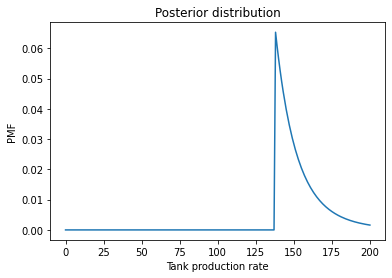

In [55]:
plot_posterior(N=10)

Using interact tool, we can have create more responsive simulations:

In [56]:
interact(plot_posterior, mu=(0, 150), sigma=(5,50), N=(0, 150));

interactive(children=(IntSlider(value=90, description='mu', max=150), IntSlider(value=30, description='sigma',…